### Preparando o ambiente

Além do pandas e matplotlib.pyplot, importei o matplotlib.ticker para formatar um gráfico.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as FormatStr

#### Mudei algumas configurações para facilitar a visualização dos dados.

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

### Copiando os dados do csv e removendo as linhas duplicadas.

In [5]:
data_frame = pd.read_csv('googleplaystore.csv')
print(data_frame[data_frame.duplicated(keep=False)])
data_frame.drop_duplicates(inplace=True)
print('\n\n')
print(data_frame[data_frame.duplicated(keep=False)])

                                                     App             Category  Rating   Reviews                Size        Installs  Type   Price Content Rating                           Genres        Last Updated               Current Ver         Android Ver
164                                         Ebook Reader  BOOKS_AND_REFERENCE     4.1     85842                 37M      5,000,000+  Free       0       Everyone                Books & Reference       June 25, 2018                     5.0.6          4.0 and up
192                        Docs To Go™ Free Office Suite             BUSINESS     4.1    217730  Varies with device     50,000,000+  Free       0       Everyone                         Business       April 2, 2018        Varies with device  Varies with device
193                                   Google My Business             BUSINESS     4.4     70991  Varies with device      5,000,000+  Free       0       Everyone                         Business       July 24, 2018       

##### Decidi também remover as linhas onde tenham apps com o mesmo nome. Resetei o índice e imprimi o resutado para confirmar.

In [ ]:
print(data_frame[data_frame.duplicated(subset='App', keep=False)])


In [ ]:
data_frame.drop_duplicates(subset=[data_frame.columns[0]], inplace=True, keep='first')
data_frame.reset_index(drop=True, inplace=True)
print(data_frame)

### Verifiquei a existencia de anomalias no data frame.

In [8]:
print(data_frame.isnull().sum())
print(data_frame[data_frame.isnull().any(axis=1)])
print(data_frame[(data_frame['Rating'] > 5.0 ) | (data_frame['Rating'] < 0.0)])
print(data_frame[(data_frame['Type'] == 'Free') & (pd.to_numeric(data_frame['Price'], errors='coerce') > 0)])

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
                                                    App             Category  Rating Reviews                Size    Installs  Type     Price Content Rating                           Genres        Last Updated                        Current Ver         Android Ver
15                      Learn To Draw Kawaii Characters       ART_AND_DESIGN     3.2      55                2.7M      5,000+  Free         0       Everyone                     Art & Design        June 6, 2018                                NaN          4.2 and up
23                               Mcqueen Coloring pages       ART_AND_DESIGN     NaN      61                7.0M    100,000+  Free         0       Everyone  Art

### Retirei a linha com rating acima de 5


In [9]:
data_frame.drop(data_frame[data_frame['Rating'] == 19].index, inplace=True)

### Formatei a coluna "Installs" para criar o gráfico.

In [10]:
data_frame['Installs'] = data_frame['Installs'].str.replace('+', '')
data_frame['Installs'] = data_frame['Installs'].str.replace(',', '')
data_frame['Installs'] = pd.to_numeric(data_frame['Installs'])


In [ ]:
print(data_frame)

### Gráfico de barras contendo os top 5 apps por número de instalações.

<function matplotlib.pyplot.show(close=None, block=None)>

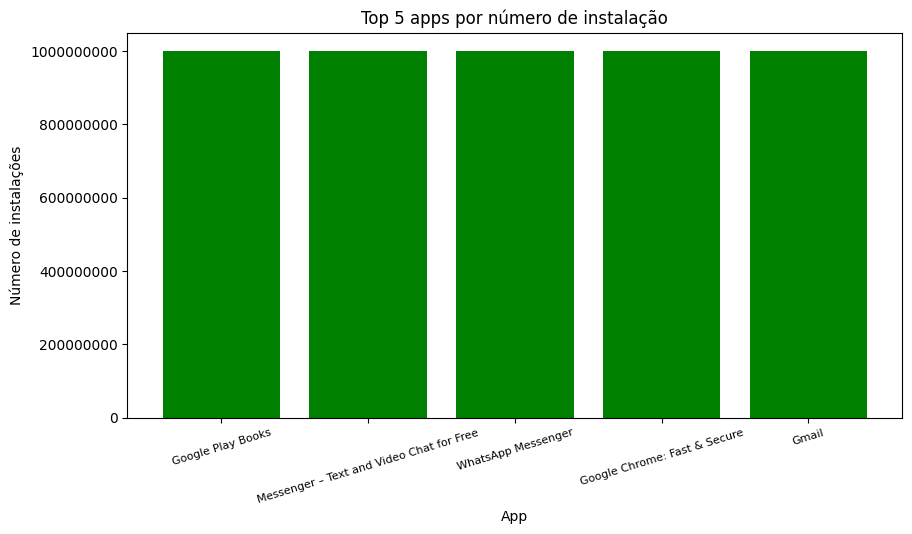

In [11]:
top_app_instalacao = data_frame.nlargest(5, 'Installs')

plt.figure(figsize=(10, 5))
plt.bar(top_app_instalacao['App'], top_app_instalacao['Installs'], color='green')
plt.xlabel('App')
plt.ylabel("Número de instalações")
plt.title('Top 5 apps por número de instalação')
plt.xticks(rotation=17, fontsize = 8)
plt.ticklabel_format(style='plain', axis='y')
plt.show

### Pie chart com as categorias que mais aparecem entre os apps.

##### Verificação para identificar anomalias

In [ ]:
print(f'Categorias: {data_frame['Category'].unique()}')

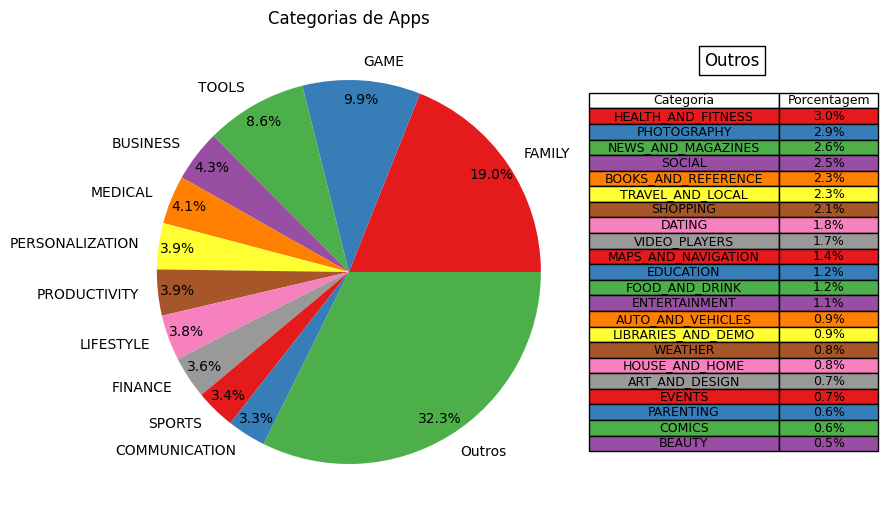

In [13]:
categorias = data_frame['Category'].value_counts()
limite = 0.03 * sum(categorias)
categorias_acima_limite = categorias[categorias >= limite]
categorias_abaixo_limite = categorias[categorias < limite]
categorias_acima_limite['Outros'] = categorias_abaixo_limite.sum()
categorias_abaixo_limite_perc = (categorias_abaixo_limite / sum(categorias)) * 100
plt.figure(figsize=(12, 8))
plt.pie(categorias_acima_limite, labels=categorias_acima_limite.index, autopct='%1.1f%%', colors=plt.get_cmap('Set1').colors, pctdistance=0.9)
plt.title('Categorias de Apps')
table_data = pd.DataFrame({
    'Categoria': categorias_abaixo_limite.index,
    'Porcentagem': categorias_abaixo_limite_perc.values
})
table_data['Porcentagem'] = table_data['Porcentagem'].map(lambda x: f'{x:.1f}%')
table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='right', cellLoc='center')
table.auto_set_column_width(col=list(range(len(table_data.columns))))
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.2)
colors = plt.get_cmap('Set1').colors
for i, key in enumerate(categorias_abaixo_limite.index):
    table[(i+1, 0)].set_facecolor(colors[i % len(colors)])
    table[(i+1, 1)].set_facecolor(colors[i % len(colors)])
plt.text(1.85, 1.10, 'Outros', ha='left', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

plt.subplots_adjust(left=0.3, right=0.7) 
plt.show()

### Mostrar o app mais caro do dataset

In [14]:
data_frame['Price'] = data_frame['Price'].replace(r'[\$,]', '', regex=True).astype(float)
print(data_frame.loc[data_frame['Price'].idxmax()])

App               I'm Rich - Trump Edition
Category                         LIFESTYLE
Rating                                 3.6
Reviews                                275
Size                                  7.3M
Installs                             10000
Type                                  Paid
Price                                400.0
Content Rating                    Everyone
Genres                           Lifestyle
Last Updated                   May 3, 2018
Current Ver                          1.0.1
Android Ver                     4.1 and up
Name: 3469, dtype: object


### Mostrar quantos app são classificados como "Mature +17"

In [15]:
print(f'Quantidade de apps com classificação Mature: \
{(data_frame['Content Rating'] == 'Mature 17+').sum()}')

Quantidade de apps com classificação Mature: 393


### Mostre o top 10 apps por número de reviews

Primeiro, formatei a coluna, para retirar as ',' e mudar o tipo da coluna para inteiro.

In [16]:
data_frame['Reviews'] = data_frame['Reviews'].str.replace(',', '').astype(int)

Depois criei a lista 

In [17]:
top_app_review = data_frame.sort_values(by='Reviews', ascending=False).head(10)
print("Top 10 apps por número de reviews\n")
print(top_app_review[['App', 'Reviews']])

Top 10 apps por número de reviews

                                                    App   Reviews
2002                                           Facebook  78158306
300                                  WhatsApp Messenger  69119316
2003                                          Instagram  66577313
299            Messenger – Text and Video Chat for Free  56642847
1372                                     Clash of Clans  44891723
3181            Clean Master- Space Cleaner & Antivirus  42916526
1356                                     Subway Surfers  27722264
2908                                            YouTube  25655305
6486  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1362                                       Clash Royale  23133508


### Criando o primeiro cálculo, em forma de lista.

Aqui optei por cálcular a lista dos 10 aplicativos pagos que mais faturaram, se baseando apenas no número de reviews e no preço.

In [18]:
data_frame['Receita Estimada'] = data_frame['Price'] * data_frame['Reviews']
top_app_receita = data_frame[['App', 'Price', 'Reviews', 'Receita Estimada']]\
.sort_values(by='Receita Estimada', ascending=False).head(10)
data_frame.drop(columns=['Receita Estimada'])
print("Top 10 apps por receita bruta")
print(top_app_receita)


Top 10 apps por receita bruta
                                App   Price  Reviews  Receita Estimada
1743                      Minecraft    6.99  2376564       16612182.36
6370  Grand Theft Auto: San Andreas    6.99   348962        2439244.38
4396                      I am rich  399.99     3547        1418764.53
4400              I Am Rich Premium  399.99     1867         746781.33
7743                    Bloons TD 5    2.99   190086         568357.14
3274                   Weather Live    5.99    76593         458792.07
7687            DraStic DS Emulator    4.99    87766         437952.34
3208                  Hitman Sniper    0.99   408292         404209.08
1744     Card Wars - Adventure Time    2.99   129603         387512.97
1495             Star Wars ™: DIRTY    9.99    38207         381687.93


### Segundo cálculo, por valor

Optei por calcular qual categoria tem o maior número de apps

In [19]:
categoria_mais_apps = data_frame['Category'].value_counts().idxmax()
quant_mais_apps = data_frame['Category'].value_counts().max()
print(f'A categoria com mais apps é: {categoria_mais_apps} \
com {quant_mais_apps} aplicativos')


A categoria com mais apps é: FAMILY com 1832 aplicativos


### Criando gráfico de linha para os top 10 apps por número de reviews

Aqui eu alterei o número de caracteres da coluna "App" para melhor visualização no gráfico.

<function matplotlib.pyplot.show(close=None, block=None)>

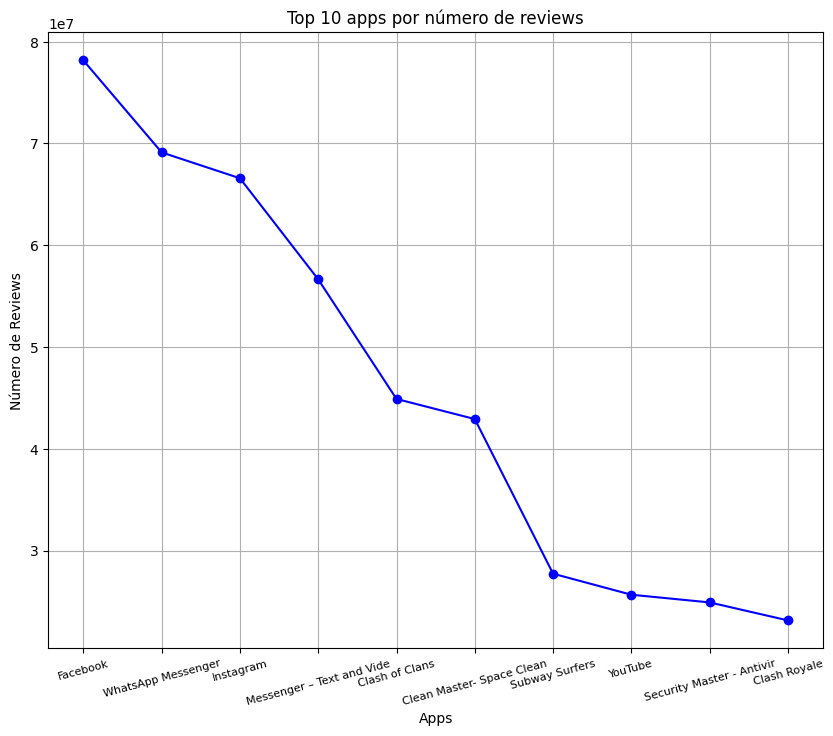

In [20]:
top_app_review['App'] = top_app_review['App'].apply(lambda x: x[:25])

plt.figure(figsize=(10,8))
plt.plot(top_app_review['App'],top_app_review['Reviews'], marker='o', linestyle='-', color='b')
plt.xlabel('Apps')
plt.ylabel('Número de Reviews')
plt.title('Top 10 apps por número de reviews')
plt.xticks(rotation=15, fontsize=8)
plt.grid(True)
plt.show

### Criando gráfico de barras horizontal para os top 10 apps por receita estimada


<function matplotlib.pyplot.show(close=None, block=None)>

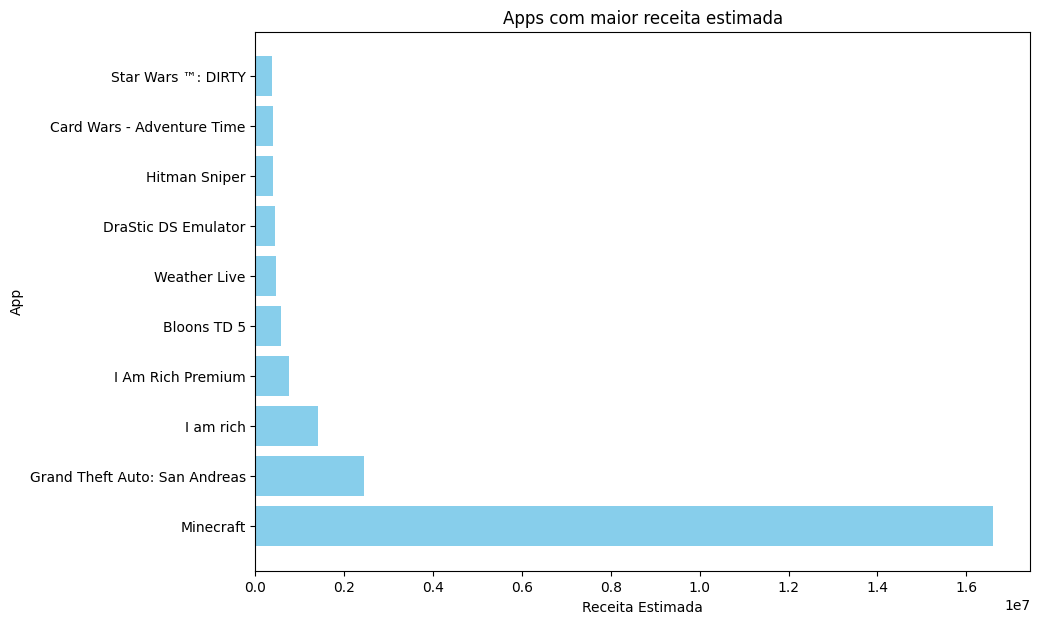

In [21]:
plt.figure(figsize=(10, 7))
plt.barh(top_app_receita['App'], top_app_receita['Receita Estimada'], color='skyblue')
plt.xlabel('Receita Estimada')
plt.ylabel('App')
plt.title('Apps com maior receita estimada')
plt.show